In [1]:
# 📦 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional tools
import plotly.express as px
import geopandas as gpd
import geopandas.tools
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv('time_series_covid19_deaths_global.csv')

# Preview the data
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [3]:
# Check dataset structure
print(df.columns)

# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

In [5]:
# Reshape the dataframe to have a 'date' column
df_melted = pd.melt(df, 
					id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
					var_name='date', 
					value_name='cases')

# Convert 'date' to datetime
df_melted['date'] = pd.to_datetime(df_melted['date'])

# Rename 'Country/Region' to 'location' for consistency
df_melted.rename(columns={'Country/Region': 'location'}, inplace=True)

# Filter for selected countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df_melted[df_melted['location'].isin(countries)]

# Handle missing values
df_filtered = df_filtered.fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_4348\1560883622.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['date'] = pd.to_datetime(df_melted['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_4348\1560883622.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered = df_filtered.fillna(method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_4348\1560883622.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered = df_filtered.fillna(method='ffill')


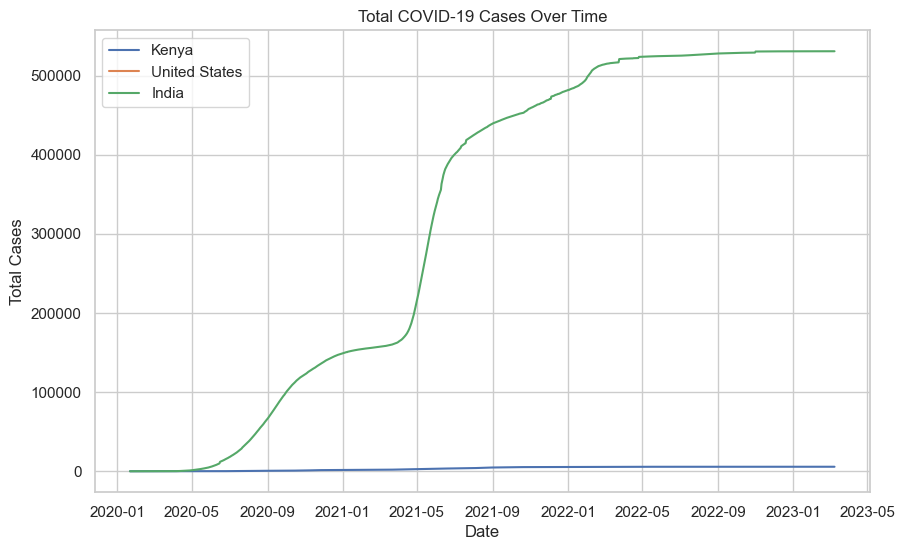

In [7]:
# Line plot: Total cases over time
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

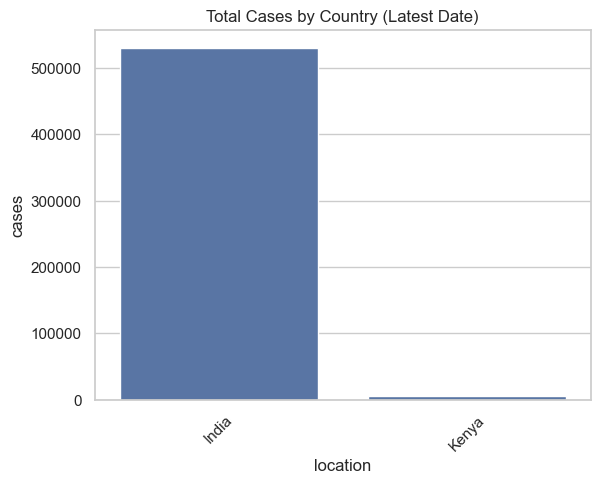

In [9]:
# Bar chart: Total cases by country (latest date)
latest = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest = latest[['location', 'cases']].dropna().sort_values(by='cases', ascending=False)

sns.barplot(data=latest, x='location', y='cases')
plt.title("Total Cases by Country (Latest Date)")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Ensure the 'deaths' column is added to df_filtered
if 'deaths' not in df_filtered.columns:
	deaths_data = pd.melt(df, 
						  id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
						  var_name='date', 
						  value_name='deaths')
	deaths_data['date'] = pd.to_datetime(deaths_data['date'])
	deaths_data.rename(columns={'Country/Region': 'location'}, inplace=True)
	df_filtered = df_filtered.merge(deaths_data[['location', 'date', 'deaths']], 
									on=['location', 'date'], 
									how='left')

# Death rate analysis
df_filtered['death_rate'] = df_filtered['deaths'] / df_filtered['cases']

C:\Users\User\AppData\Local\Temp\ipykernel_4348\2993310031.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_data['date'] = pd.to_datetime(deaths_data['date'])


C:\Users\User\AppData\Local\Temp\ipykernel_4348\3859519074.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])


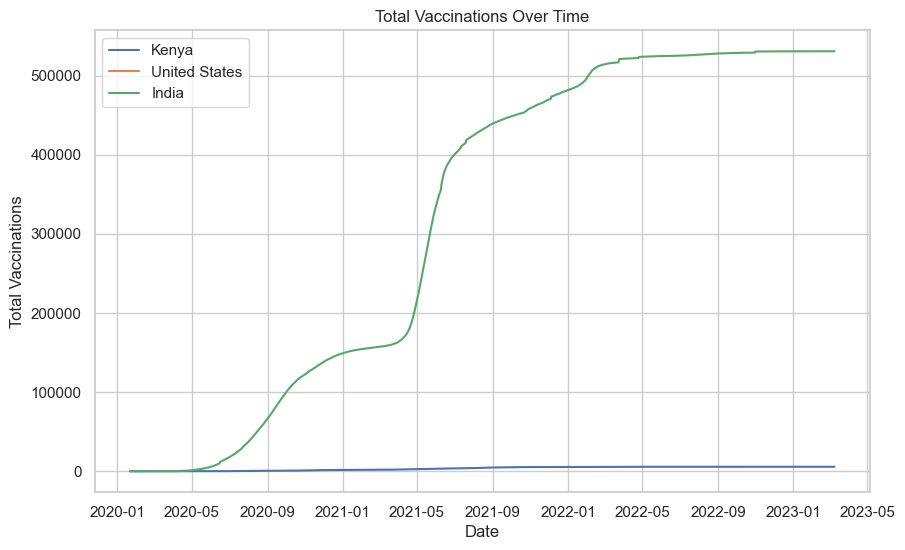

In [14]:
# Ensure the 'total_vaccinations' column is added to df_filtered
if 'total_vaccinations' not in df_filtered.columns:
    vaccinations_data = pd.melt(df, 
                                id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                                var_name='date', 
                                value_name='total_vaccinations')
    vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
    vaccinations_data.rename(columns={'Country/Region': 'location'}, inplace=True)
    df_filtered = df_filtered.merge(vaccinations_data[['location', 'date', 'total_vaccinations']], 
                                    on=['location', 'date'], 
                                    how='left')

# Line plot: Total vaccinations over time
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()

In [22]:
# Latest data by country
latest_data = df_melted[df_melted['date'] == df_melted['date'].max()]
# Ensure the 'iso_code' column exists or use 'location' for mapping
map_data = latest_data[['location', 'cases']].dropna()

import plotly.express as px
fig = px.choropleth(map_data,
                    locations="location",         # Use location names for mapping
                    locationmode="country names", # Specify that locations are country names
                    color="cases",
                    hover_name="location",
                    title="Global COVID-19 Cases",
                    color_continuous_scale="OrRd")
fig.show()
# Save the final dataframe to a CSV file
df_filtered.to_csv('covid19_analysis.csv', index=False)